c:\apps\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


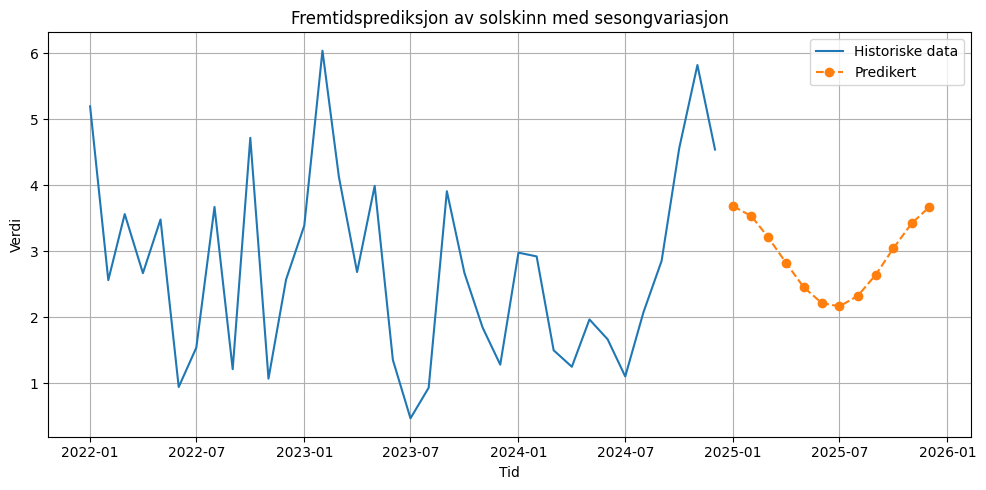

In [1]:
# -- Importer nødvendige biblioteker --
import sys
import pandas as pd
import matplotlib.pyplot as plt

# -- Legg til sti til src-mappen for å kunne importere egen kode --
sys.path.append('../src')
from predictions import predict_from_csv  # Importer funksjonen som gjør prediksjon

# -- Parametere du enkelt kan endre for å teste ulike datasett og oppsett --

file_path = '../data/Sunshine_data.csv'  # <- Filsti til CSV med målinger. Endre denne hvis du vil bruke en annen fil

freq = 'MS'             # <- Frekvens for aggregering. 'W' = ukentlig, 'MS' = månedlig. Passer med sesonglogikken i modellen
periods = 12           # <- Antall fremtidige tidsperioder du vil forutsi
historikk_start = '2022-01-01'  # <- Starttidspunkt for plottet av historiske data. Endre for å zoome inn på nyere data

# -- Hent prediksjon og historiske data fra funksjonen --
file_path = '../data/Precipitation_data.csv'  # <- riktig fil

forecast_df, historical_df = predict_from_csv(
    file_path,
    freq,
    periods,
)



# -- Filtrer historiske data etter valgt startdato (for plottet) --
# Denne linjen gjør at kun data etter "historikk_start" vises i grafen
historical_df = historical_df[historical_df['referenceTimestamp'] >= pd.to_datetime(historikk_start)]

# -- Plotting av data --
plt.figure(figsize=(10, 5))  # <- Endre størrelsen her om du vil ha større eller mindre figur

# Tegn historiske verdier
plt.plot(historical_df['referenceTimestamp'], historical_df['historical_value'], label='Historiske data')

# Tegn predikert fremtid
plt.plot(forecast_df['timestamp'], forecast_df['predicted_value'],
         linestyle='--', marker='o', label='Predikert')

# -- Tilpass aksene og utseendet --
plt.title('Fremtidsprediksjon av solskinn med sesongvariasjon')  # <- Endre tittel om du jobber med annet datasett
plt.xlabel('Tid')
plt.ylabel('Verdi')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
